# Fitting the high-k linear power spectrum

In [1]:
%matplotlib inline
import numpy as np
import os
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 150
mpl.rcParams['figure.dpi'] = 150
import camb
from camb import model, initialpower

### Run CAMB for a given cosmology

In [2]:
## output redshifts
zs=[2,3,4]
## parameters matching params_ref.ini
omnuh2=0.00064
mnu=93.14*omnuh2
omch2=0.112
ombh2=0.0226
omk=0.0
hubble=70
YHe=0.24
TCMB=2.7255
ns=0.96
As=2.1e-09

In [3]:
## Generate default cosmology (with massive neutrinos)
pars = camb.CAMBparams()
pars.set_cosmology(H0=hubble, ombh2=ombh2, omch2=omch2, omk=omk,num_massive_neutrinos=1, 
                   neutrino_hierarchy='degenerate',mnu=mnu,YHe=YHe,TCMB=TCMB)
pars.InitPower.set_params(As=As, ns=ns)
pars.set_matter_power(redshifts=zs, kmax=30.0);

Note: redshifts have been re-sorted (earliest first)


In [4]:
results = camb.get_results(pars)
results.calc_power_spectra(pars)
# fluid=8 specifies that went the power spectrum for CDM+baryons
fluid=8
# need to specify a higher number of k points to have proper description at k ~ 1 h/Mpc
kh, zs, Ph = results.get_matter_power_spectrum(var1=fluid,var2=fluid,npoints=1000,maxkh=20)

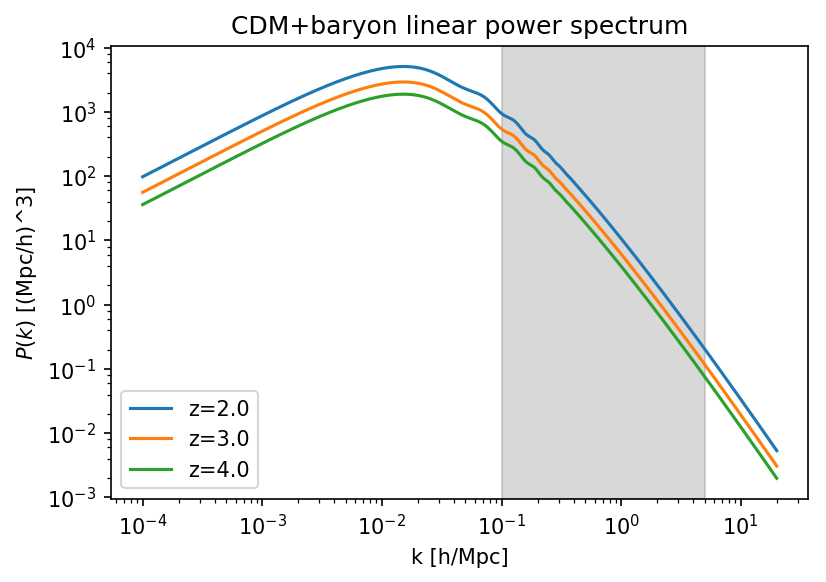

In [5]:
Nz=len(zs)
plt.figure()
for iz in range(Nz): 
    z=zs[iz]
    plt.loglog(kh,Ph[iz],label='z='+str(z))
plt.title(r"CDM+baryon linear power spectrum")
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"$P(k)$ [(Mpc/h)^3]")
plt.legend()
plt.axvspan(0.1,5.0,alpha=0.3, color='gray')

## Fit a power-law (with running) to the high-k power spectrum

In [6]:
# use a single redshift
iz=1
# use a certain k range to fit
kh_fit_min=0.5
kh_fit_max=2.0
kh_fit= (kh > kh_fit_min) & (kh < kh_fit_max)
poly_deg1=np.polyfit(np.log(kh[kh_fit]), np.log(Ph[iz][kh_fit]), deg=1)
Ph_deg1 = np.poly1d(poly_deg1)
poly_deg2=np.polyfit(np.log(kh[kh_fit]), np.log(Ph[iz][kh_fit]), deg=2)
Ph_deg2 = np.poly1d(poly_deg2)

(0.1, 10000.0)

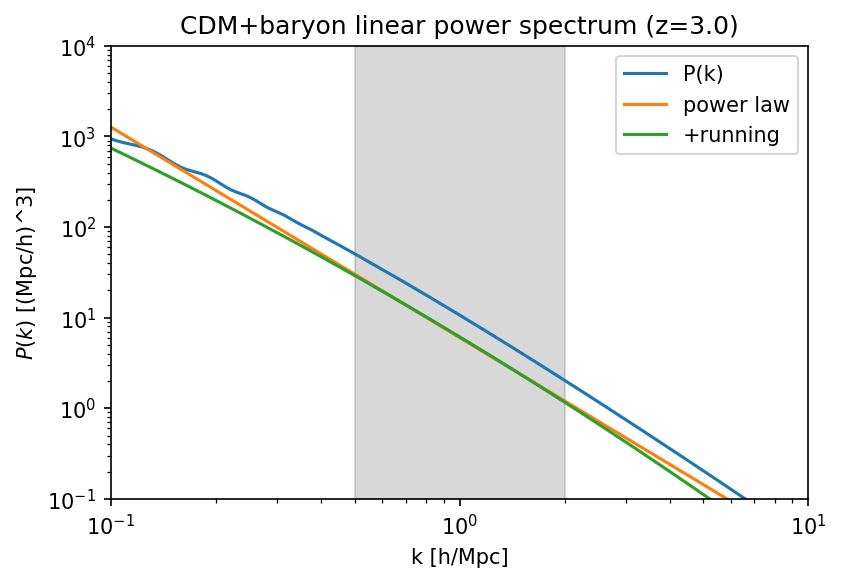

In [7]:
plt.figure()
plt.loglog(kh,Ph[0],label='P(k)')
plt.loglog(kh,np.exp(Ph_deg1(np.log(kh))),label='power law')
plt.loglog(kh,np.exp(Ph_deg2(np.log(kh))),label='+running')
plt.title(r"CDM+baryon linear power spectrum (z="+str(zs[iz])+")")
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"$P(k)$ [(Mpc/h)^3]")
plt.legend()
plt.axvspan(kh_fit_min,kh_fit_max,alpha=0.3, color='gray')
plt.xlim(0.1,10.0)
plt.ylim(1e-1,1e4)

(0.5, 1.3)

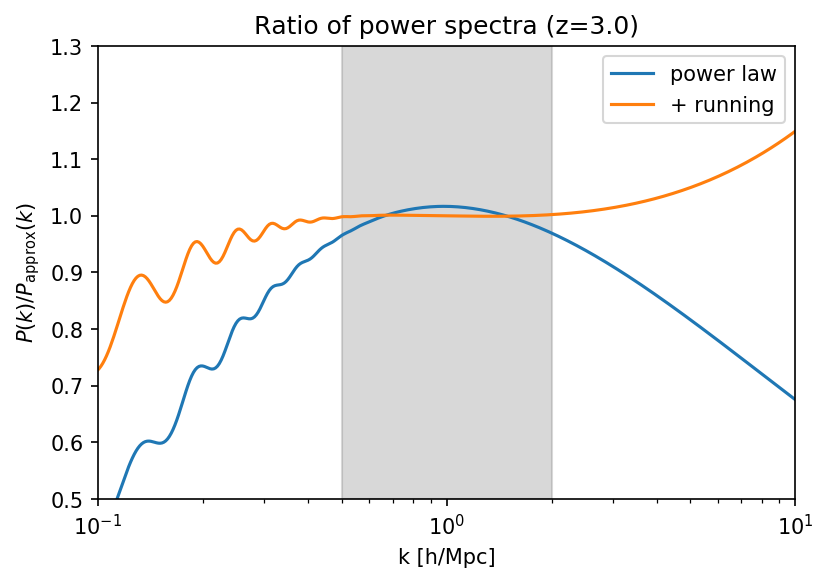

In [8]:
plt.figure()
plt.semilogx(kh,Ph[iz]/np.exp(Ph_deg1(np.log(kh))),label='power law')
plt.semilogx(kh,Ph[iz]/np.exp(Ph_deg2(np.log(kh))),label='+ running')
plt.title(r"Ratio of power spectra (z="+str(zs[iz])+")")
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"$P(k)/P_{\rm approx}(k)$")
plt.legend()
plt.axvspan(kh_fit_min,kh_fit_max,alpha=0.3, color='gray')
plt.xlim(0.1,10.0)
plt.ylim(0.5,1.3)

(0.9, 1.1)

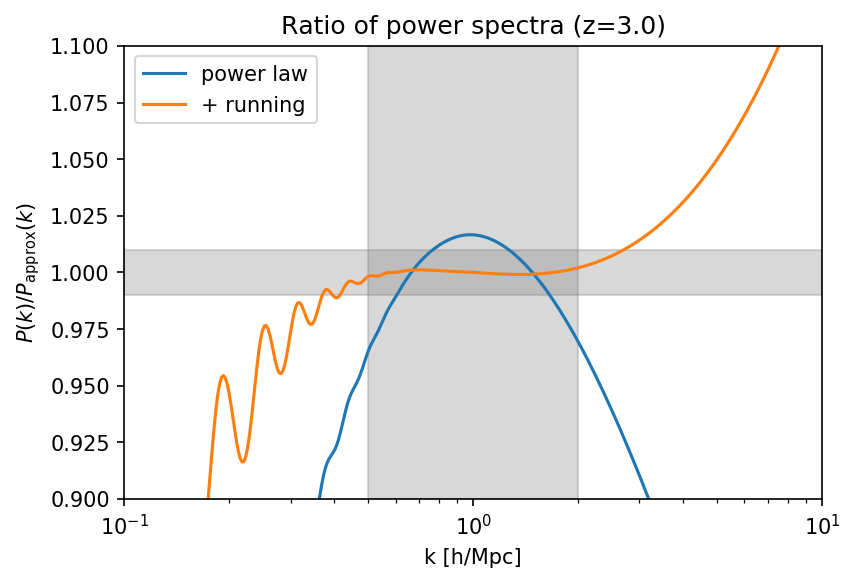

In [9]:
plt.figure()
plt.semilogx(kh,Ph[iz]/np.exp(Ph_deg1(np.log(kh))),label='power law')
plt.semilogx(kh,Ph[iz]/np.exp(Ph_deg2(np.log(kh))),label='+ running')
plt.title(r"Ratio of power spectra (z="+str(zs[iz])+")")
plt.xlabel("k [h/Mpc]")
plt.ylabel(r"$P(k)/P_{\rm approx}(k)$")
plt.legend()
plt.axvspan(kh_fit_min,kh_fit_max,alpha=0.3, color='gray')
plt.axhspan(0.99,1.01,alpha=0.3, color='gray')
plt.xlim(0.1,10.0)
plt.ylim(0.9,1.1)